In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# val_set = pd.read_csv('./val.csv', header=None)
# val_set.head()

In [4]:
# val_set.loc[:,0] = val_set.loc[:,0].apply(lambda x: x+'_rgb')

In [5]:
# val_keys = list(val_set.loc[:,0].values)
# val_keys

In [6]:
# truth_data = pd.read_csv('./truth_data.csv')
# truth_data.drop('Unnamed: 0', axis=1, inplace=True)
# truth_data.head()

In [7]:
# truth_data.loc[truth_data.name.isin(val_keys),'set'] = 'val'
# truth_data.to_csv('./truth_data_fixed.csv')

In [8]:
truth_data = pd.read_csv('./truth_data_fixed.csv')
truth_data.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
train_truth_data = truth_data.loc[truth_data.set == 'train']
val_truth_data = truth_data.loc[truth_data.set == 'val']

In [10]:
test_truth_data = pd.read_csv('./test_truth_data.csv')
test_truth_data.drop('Unnamed: 0', axis=1, inplace=True)
test_truth_data.head()

set             name  grassland_other  forest  sparse_forest  \
0  test  25616_11023_rgb            10767       0              0   
1  test  25616_11024_rgb             9117       0              0   
2  test  25616_11025_rgb            23534       0              0   
3  test  25616_11026_rgb            24611       0              0   
4  test  25616_11027_rgb            28410       0              0   

   lakes_and_wetlands  glaciers_and_permanent_snow  sparse_rocks  scree  \
0                   0                            0         23312   5921   
1                   0                            0         30761    122   
2                   0                            0             0  15301   
3                   0                            0             0    436   
4                   0                            0             0  11590   

   bed_rock  total_pixels  
0         0         40000  
1         0         40000  
2      1165         40000  
3     14953         40000  
4         0         40000

In [11]:
print(train_truth_data.columns)

Index(['set', 'name', 'grassland_other', 'forest', 'sparse_forest',
       'lakes_and_wetlands', 'glaciers_and_permanent_snow', 'sparse_rocks',
       'scree', 'bed_rock', 'total_pixels'],
      dtype='object')


In [12]:
cols = ['grassland_other', 'forest', 'sparse_forest',
       'lakes_and_wetlands', 'glaciers_and_permanent_snow', 'sparse_rocks',
       'scree', 'bed_rock']
       
data_train = []
data_val = []
data_test =[]

for col in cols:
    train_sum = train_truth_data[col].sum()
    train_count = train_truth_data[col].astype(bool).sum()
    val_sum = val_truth_data[col].sum()
    val_count = val_truth_data[col].astype(bool).sum()
    test_sum = test_truth_data[col].sum()
    test_count = test_truth_data[col].astype(bool).sum()
    row_train = {
        'label':col,
        'total_pixels':train_sum,
        'total_images':train_count
    }
    row_val = {
        'label':col,
        'total_pixels':val_sum,
        'total_images':val_count
    }
    row_test = {
        'label':col,
        'total_pixels':test_sum,
        'total_images':test_count
    }
    data_train.append(row_train)
    data_val.append(row_val)
    data_test.append(row_test)

train_collected = pd.DataFrame(data_train)
val_collected = pd.DataFrame(data_val)
test_collected = pd.DataFrame(data_test)


In [13]:
train_collected.head()

label  total_pixels  total_images
0              grassland_other      72519725          4254
1                       forest      19336033          1052
2                sparse_forest      18342686          1334
3           lakes_and_wetlands       5936946           256
4  glaciers_and_permanent_snow      10797402           645

In [14]:
val_collected.head()

label  total_pixels  total_images
0              grassland_other      10409501           728
1                       forest         59227            11
2                sparse_forest        784715            90
3           lakes_and_wetlands      10144832           331
4  glaciers_and_permanent_snow        669019            47

In [15]:
test_collected.head()

label  total_pixels  total_images
0              grassland_other      38423479          2352
1                       forest       9328316           419
2                sparse_forest       5627343           459
3           lakes_and_wetlands       3769122           156
4  glaciers_and_permanent_snow       8173062           458

In [16]:
for df in [train_collected, val_collected, test_collected]:
    df['total_pixels_perc'] = df.total_pixels/df.total_pixels.sum()
    df['total_images_perc'] = df.total_images/df.total_images.sum()

Text(0.5, 1.0, 'Number of Images Containing Each Label (Total Images = 7357)')

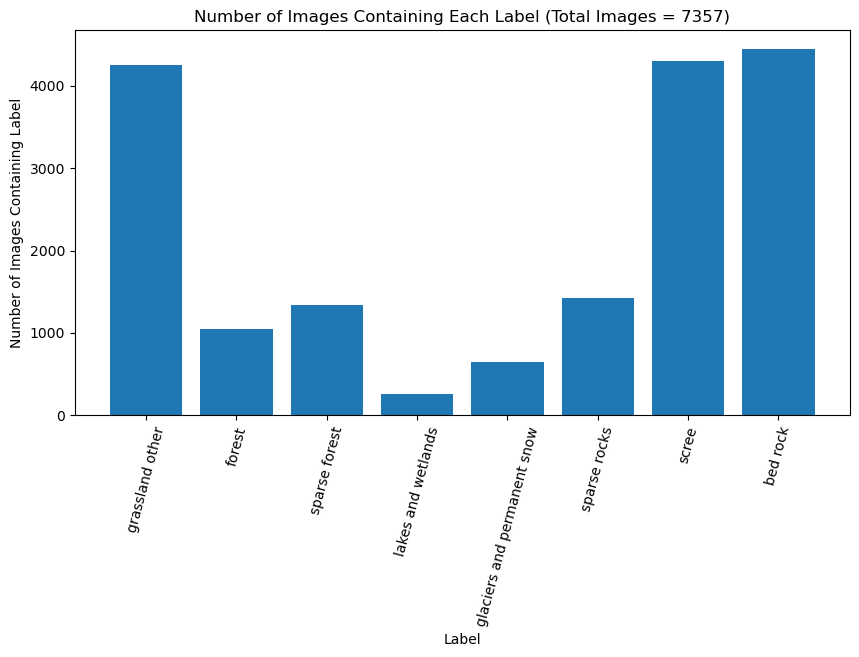

In [17]:
plt.figure(figsize=(10,5))
plt.bar(x=train_collected.label.apply(lambda x: x.replace('_',' ')), height=train_collected.total_images)
plt.xticks(rotation=75)
plt.xlabel('Label')
plt.ylabel('Number of Images Containing Label')
plt.title('Number of Images Containing Each Label (Total Images = 7357)')


Text(0.5, 1.0, 'Number of Images Containing Each Label (Total Images = 1225)')

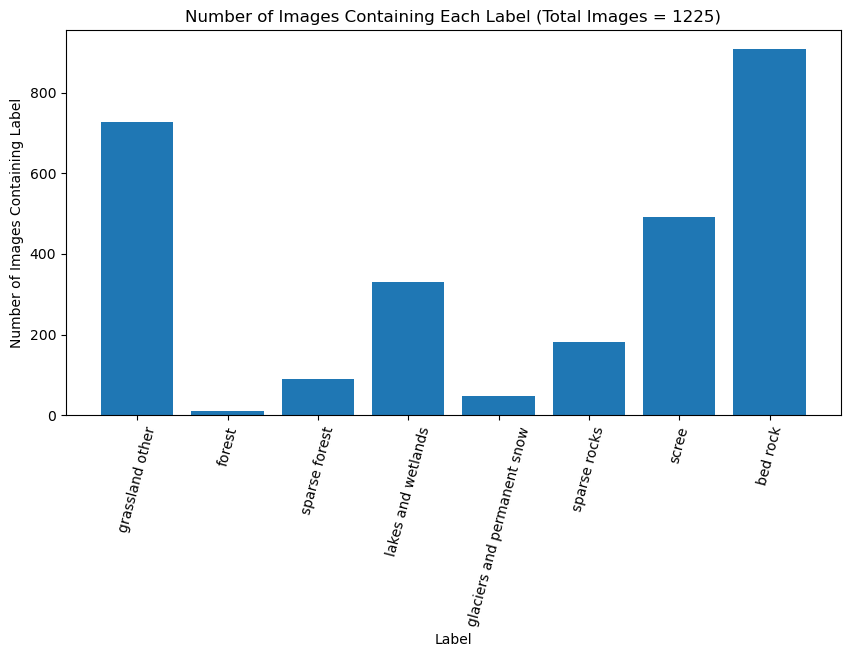

In [18]:
plt.figure(figsize=(10,5))
plt.bar(x=val_collected.label.apply(lambda x: x.replace('_',' ')), height=val_collected.total_images)
plt.xticks(rotation=75)
plt.xlabel('Label')
plt.ylabel('Number of Images Containing Label')
plt.title('Number of Images Containing Each Label (Total Images = 1225)')

Text(0.5, 1.0, 'Number of Images Containing Each Label (Total Images = 3679)')

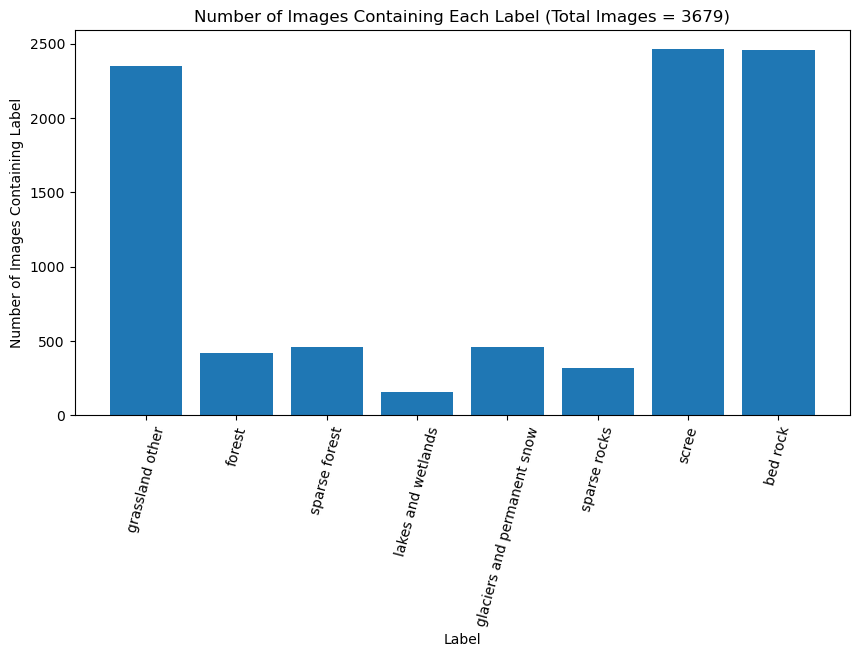

In [19]:
plt.figure(figsize=(10,5))
plt.bar(x=test_collected.label.apply(lambda x: x.replace('_',' ')), height=test_collected.total_images)
plt.xticks(rotation=75)
plt.xlabel('Label')
plt.ylabel('Number of Images Containing Label')
plt.title('Number of Images Containing Each Label (Total Images = 3679)')

In [20]:
new_labels = ['Grassland and Others', 'Forest', 'Sparse Forest', 'Water',
 'Glacier and Permanent Snow', 'Sparse Rocks', 'Scree', 'Rocks']
cmap = plt.get_cmap("tab10")

C:\Users\aliwa\AppData\Local\Temp\ipykernel_10840\2600705815.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(labels=new_labels, size=10, ha='right', rotation=30)
C:\Users\aliwa\AppData\Local\Temp\ipykernel_10840\2600705815.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(labels=new_labels, size=10, ha='right', rotation=30)
C:\Users\aliwa\AppData\Local\Temp\ipykernel_10840\2600705815.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(labels=new_labels, size=10, ha='right', rotation=30)
C:\Users\aliwa\AppData\Local\Temp\ipykernel_10840\2600705815.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(labels=new_labels, size=10, ha='right', rotation=30)
C:\Users\aliwa\AppData\Local\Temp\ipykernel_10840\2600705815.py:10: UserWarning: FixedFormatter should only be used 

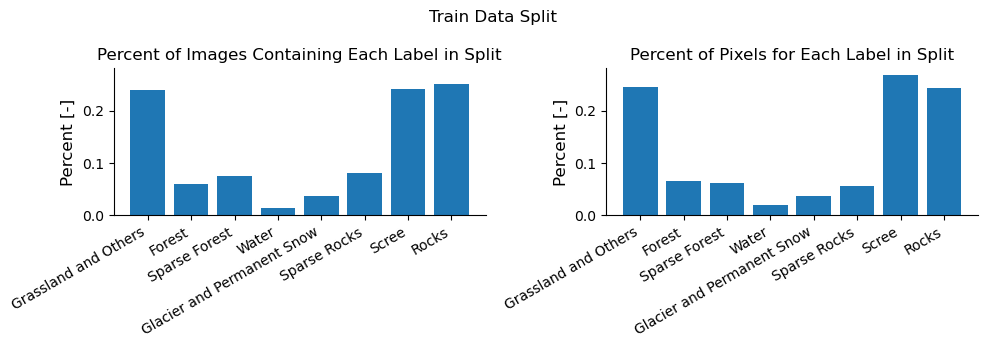

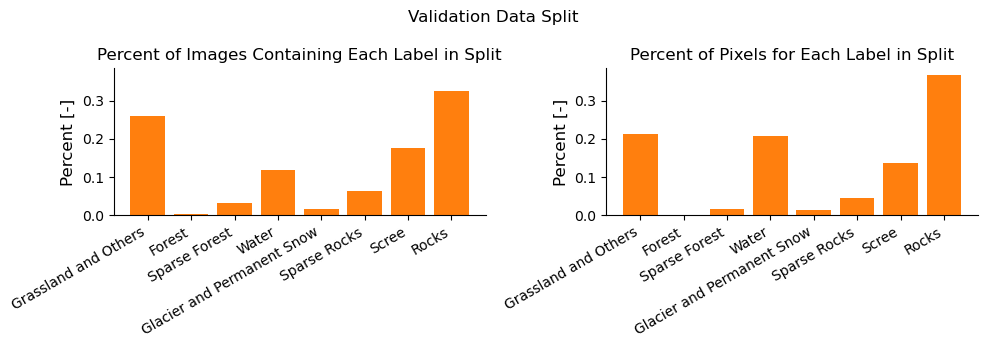

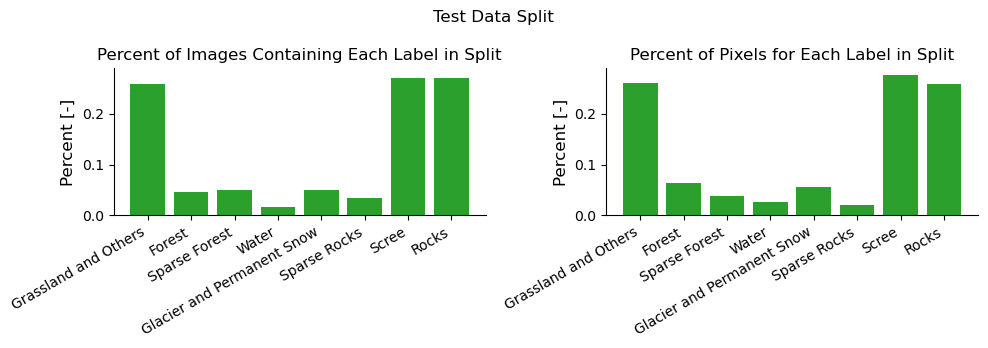

In [33]:
count = 0
Titles = ['Train Data Split', 'Validation Data Split', 'Test Data Split']
labels = ['grassland and others', 'forest', 'sparse forest', 'water',
 'glacier and permanent snow', 'sparse rocks', 'scree', 'rocks']
for df in [train_collected, val_collected, df]:
    fig, axs = plt.subplots(1,2, figsize=(10,3.5), sharey=True)
    fig.suptitle(Titles[count])
    axs[0].bar(x=df.label.apply(lambda x: x.replace('_',' ')), height=df.total_images_perc,
                    color=cmap(count))
    axs[0].set_xticklabels(labels=new_labels, size=10, ha='right', rotation=30)
    # axs[0].set_xlabel('Label')
    axs[0].set_ylabel('Percent [-]', size=12)
    axs[0].set_title('Percent of Images Containing Each Label in Split')

    axs[1].bar(x=df.label.apply(lambda x: x.replace('_',' ')), height=df.total_pixels_perc,
                    color=cmap(count))
    axs[1].set_xticklabels(labels=new_labels, size=10, ha='right', rotation=30)
    # axs[1].set_xlabel('Label')
    axs[1].set_ylabel('Percent [-]', size=12)
    axs[1].set_title('Percent of Pixels for Each Label in Split')
    axs[1].yaxis.set_tick_params(labelleft=True)
    axs[0].spines.right.set_visible(False)
    axs[0].spines.top.set_visible(False)
    axs[1].spines.right.set_visible(False)
    axs[1].spines.top.set_visible(False)

    plt.tight_layout()
    # plt.text(0, 0, Titles[count],
    #      horizontalalignment='center',
    #      fontsize=20)
    plt.savefig(f'./{Titles[count]}.pdf',format= 'pdf',dpi=500)
    count+=1

The next step will be to pick pictures with a lot of different classes for ground truths

In [22]:
train_truth_data.head()

set             name  grassland_other  forest  sparse_forest  \
0  train  25566_11087_rgb                0       0              0   
1  train  25566_11088_rgb             4017       0              0   
2  train  25566_11089_rgb              749       0              0   
3  train  25567_11083_rgb                0       0              0   
4  train  25567_11084_rgb                0       0              0   

   lakes_and_wetlands  glaciers_and_permanent_snow  sparse_rocks  scree  \
0                   0                            0             0  20054   
1                   0                            0             0  19752   
2                   0                            0             0  35667   
3                   0                            0             0  27316   
4                   0                        19151             0    838   

   bed_rock  total_pixels  
0     19946         40000  
1     16231         40000  
2      3584         40000  
3     12684         40000  
4     20011         40000

In [23]:
print(train_truth_data.columns)

Index(['set', 'name', 'grassland_other', 'forest', 'sparse_forest',
       'lakes_and_wetlands', 'glaciers_and_permanent_snow', 'sparse_rocks',
       'scree', 'bed_rock', 'total_pixels'],
      dtype='object')


In [24]:
def get_class_num(df):
    data = []
    labels = ['forest', 'sparse_forest', 'lakes_and_wetlands', 'glaciers_and_permanent_snow', 'sparse_rocks']
    for ind, row in df.iterrows():
        count=0
        classes=[]
        for label in labels:
            if row[label] !=0:
                count+=1
                classes.append(label)
        new_data ={
            'name': row['name'],
            'num_classes':count,
            'classes': classes
        }
        data.append(new_data)
    return pd.DataFrame(data)


In [25]:
train_max_class = train_truth_data.drop(['grassland_other', 'scree', 'bed_rock'], axis=1)
data = []
labels = ['forest', 'sparse_forest', 'lakes_and_wetlands', 'glaciers_and_permanent_snow', 'sparse_rocks']
for ind, row in train_max_class.iterrows():
    count=0
    classes=[]
    for label in labels:
        if row[label] !=0:
            count+=1
            classes.append(label)
    new_data ={
        'name': row['name'],
        'num_classes':count,
        'classes': classes
    }
    data.append(new_data)

test =pd.DataFrame(data)
test.sort_values('num_classes', ascending=False).head()

name  num_classes                                classes
3741  25642_11103_rgb            3  [forest, sparse_forest, sparse_rocks]
1676  25664_11098_rgb            3  [forest, sparse_forest, sparse_rocks]
1686  25665_11098_rgb            3  [forest, sparse_forest, sparse_rocks]
5856  25599_11148_rgb            3  [forest, sparse_forest, sparse_rocks]
2755  25663_11117_rgb            3  [forest, sparse_forest, sparse_rocks]

In [26]:
train_num_classes = get_class_num(train_truth_data)
test_num_classes = get_class_num(test_truth_data)

print('Train Data:')
display(train_num_classes.sort_values('num_classes', ascending=False).head())
print('Test Data')
display(test_num_classes.sort_values('num_classes', ascending=False).head())

Train Data:


name  num_classes                                classes
3741  25642_11103_rgb            3  [forest, sparse_forest, sparse_rocks]
1676  25664_11098_rgb            3  [forest, sparse_forest, sparse_rocks]
1686  25665_11098_rgb            3  [forest, sparse_forest, sparse_rocks]
5856  25599_11148_rgb            3  [forest, sparse_forest, sparse_rocks]
2755  25663_11117_rgb            3  [forest, sparse_forest, sparse_rocks]

Test Data


name  num_classes                                classes
940   25633_11043_rgb            3  [forest, sparse_forest, sparse_rocks]
443   25628_11031_rgb            3  [forest, sparse_forest, sparse_rocks]
2834  25653_11079_rgb            3  [forest, sparse_forest, sparse_rocks]
951   25634_11044_rgb            3  [forest, sparse_forest, sparse_rocks]
2833  25653_11078_rgb            3  [forest, sparse_forest, sparse_rocks]

In [27]:
for cls in ['lakes_and_wetlands', 'glaciers_and_permanent_snow']:
    train_num_classes[cls] = train_num_classes.classes.apply(lambda x: 1 if cls in x else 0)
    test_num_classes[cls] = test_num_classes.classes.apply(lambda x: 1 if cls in x else 0)

In [28]:
print('Train Data:')
display(train_num_classes.loc[train_num_classes.lakes_and_wetlands == 1].sort_values('num_classes', ascending=False).head())
print('Test Data')
display(test_num_classes.loc[test_num_classes.lakes_and_wetlands == 1].sort_values('num_classes', ascending=False).head())

Train Data:


name  num_classes                             classes  \
420   25624_11087_rgb            2  [lakes_and_wetlands, sparse_rocks]   
2312  25629_11104_rgb            2  [lakes_and_wetlands, sparse_rocks]   
2292  25627_11104_rgb            2  [lakes_and_wetlands, sparse_rocks]   
2291  25627_11103_rgb            2  [lakes_and_wetlands, sparse_rocks]   
2281  25626_11103_rgb            2  [lakes_and_wetlands, sparse_rocks]   

      lakes_and_wetlands  glaciers_and_permanent_snow  
420                    1                            0  
2312                   1                            0  
2292                   1                            0  
2291                   1                            0  
2281                   1                            0

Test Data


name  num_classes  \
669   25595_11042_rgb            2   
1848  25621_11058_rgb            2   
1307  25635_11057_rgb            2   
1317  25636_11057_rgb            2   
1493  25614_11063_rgb            2   

                                                classes  lakes_and_wetlands  \
669                  [lakes_and_wetlands, sparse_rocks]                   1   
1848  [lakes_and_wetlands, glaciers_and_permanent_snow]                   1   
1307                 [lakes_and_wetlands, sparse_rocks]                   1   
1317                 [lakes_and_wetlands, sparse_rocks]                   1   
1493                 [lakes_and_wetlands, sparse_rocks]                   1   

      glaciers_and_permanent_snow  
669                             0  
1848                            1  
1307                            0  
1317                            0  
1493                            0

In [29]:
print('Train Data:')
display(train_num_classes.loc[train_num_classes.glaciers_and_permanent_snow == 1].sort_values('num_classes', ascending=False).head())
print('Test Data')
display(test_num_classes.loc[test_num_classes.glaciers_and_permanent_snow == 1].sort_values('num_classes', ascending=False).head())

Train Data:


name  num_classes  \
1893  25556_11105_rgb            3   
3282  25545_11104_rgb            2   
3273  25544_11105_rgb            2   
3272  25544_11104_rgb            2   
4697  25610_11129_rgb            1   

                                                classes  lakes_and_wetlands  \
1893  [forest, sparse_forest, glaciers_and_permanent...                   0   
3282        [glaciers_and_permanent_snow, sparse_rocks]                   0   
3273        [glaciers_and_permanent_snow, sparse_rocks]                   0   
3272        [glaciers_and_permanent_snow, sparse_rocks]                   0   
4697                      [glaciers_and_permanent_snow]                   0   

      glaciers_and_permanent_snow  
1893                            1  
3282                            1  
3273                            1  
3272                            1  
4697                            1

Test Data


name  num_classes  \
1858  25622_11058_rgb            2   
1246  25618_11056_rgb            2   
1848  25621_11058_rgb            2   
1857  25622_11057_rgb            2   
138   25575_11032_rgb            1   

                                                classes  lakes_and_wetlands  \
1858        [glaciers_and_permanent_snow, sparse_rocks]                   0   
1246        [glaciers_and_permanent_snow, sparse_rocks]                   0   
1848  [lakes_and_wetlands, glaciers_and_permanent_snow]                   1   
1857        [glaciers_and_permanent_snow, sparse_rocks]                   0   
138                       [glaciers_and_permanent_snow]                   0   

      glaciers_and_permanent_snow  
1858                            1  
1246                            1  
1848                            1  
1857                            1  
138                             1

In [30]:
test_truth_data.loc[test_truth_data.name =='25634_11044_rgb']

set             name  grassland_other  forest  sparse_forest  \
951  test  25634_11044_rgb             6172      84          21674   

     lakes_and_wetlands  glaciers_and_permanent_snow  sparse_rocks  scree  \
951                   0                            0         12070      0   

     bed_rock  total_pixels  
951         0         40000

In [31]:
train_truth_data.loc[train_truth_data.name =='25556_11105_rgb']

set             name  grassland_other  forest  sparse_forest  \
1893  train  25556_11105_rgb            14390     440           6737   

      lakes_and_wetlands  glaciers_and_permanent_snow  sparse_rocks  scree  \
1893                   0                          475             0  17958   

      bed_rock  total_pixels  
1893         0         40000